# Table of Contents
* [Run OCR service](#Run-OCR-service)
* [Run directly](#Run-directly)
    * [code](#code)
	* [run](#run)
* [program execution](#program-execution)
* [End](#End)


This notebook compares contains early tests of the tableparse service

In [7]:
%%capture
from __future__ import division
import numpy as np
import pandas as pd
import scipy.stats as st
import itertools
import math
from collections import Counter, defaultdict
%load_ext autoreload
%autoreload 2

In [89]:
%%capture
import matplotlib as mpl
mpl.use("Agg")
import matplotlib.pylab as plt
#%matplotlib notebook
%matplotlib inline
%load_ext base16_mplrc
%base16_mplrc light solarized
#%base16_mplrc dark solarized
plt.rcParams['grid.linewidth'] = 0
plt.rcParams['figure.figsize'] = (16.0, 10.0)

In [8]:
import numpy as np
import pandas as pd
import scipy.stats as st

import cv2
import pprint
import pickle
import json
import requests
import io

from IPython.display import display
import PIL.Image as Image

# Run OCR service

In [7]:
def query_vision_tp(image_url):
    api_entry_point = 'http://0.0.0.0:8200/v1/tableparse'
    header = {'Content-Type': 'application/json'}
    request_data = {
        'url': image_url,
    }
    json_data = json.dumps(request_data)
    response = requests.post(api_entry_point, data=json_data, headers=header)
    print(response.content)
    json_response = json.loads(response.content.decode())
    if as_json:
        response = json_response
    return response

In [8]:
def query_vision_tp_bytes(image):
    api_entry_point = 'http://0.0.0.0:8200/v1/tableparse'
    header = {'Content-Type': 'application/json'}
    request_data = {
        'image': image,
    }
    json_data = json.dumps(request_data)
    response = requests.post(api_entry_point, data=json_data, headers=header)
#     print(response.content)
    json_response = json.loads(response.content.decode())
    if json_response:
        response = json_response
    return response

In [9]:
ex_1 = '/Users/schwenk/wrk/tableparse/vision-tableparse/examples/example_1.png'
ex_2 = '/Users/schwenk/wrk/tableparse/vision-tableparse/examples/sight-word-bingo.png'

In [12]:
import base64

In [14]:
b64_image = base64.b64encode(open(ex_2, 'rb').read())

In [15]:
%load_ext snakeviz

The snakeviz extension is already loaded. To reload it, use:
  %reload_ext snakeviz


In [16]:
%snakeviz tp_response = query_vision_tp_bytes(b64_image)

TypeError: Object of type 'bytes' is not JSON serializable

In [8]:
%%prun 
tp_response = query_vision_tp_bytes(b64_image)

In [9]:
tp_response['columns']

[[{u'rectangle': [{u'x': 3, u'y': 3}, {u'x': 69, u'y': 47}], u'value': u'B'},
  {u'rectangle': [{u'x': 3, u'y': 50}, {u'x': 69, u'y': 94}],
   u'value': u'then'},
  {u'rectangle': [{u'x': 3, u'y': 97}, {u'x': 69, u'y': 141}],
   u'value': u'put'},
  {u'rectangle': [{u'x': 3, u'y': 144}, {u'x': 69, u'y': 188}],
   u'value': u'him'},
  {u'rectangle': [{u'x': 3, u'y': 191}, {u'x': 69, u'y': 234}],
   u'value': u'round'},
  {u'rectangle': [{u'x': 3, u'y': 237}, {u'x': 69, u'y': 281}],
   u'value': u'Were'}],
 [{u'rectangle': [{u'x': 72, u'y': 3}, {u'x': 137, u'y': 47}], u'value': u''},
  {u'rectangle': [{u'x': 72, u'y': 50}, {u'x': 137, u'y': 94}],
   u'value': u'as'},
  {u'rectangle': [{u'x': 72, u'y': 97}, {u'x': 137, u'y': 141}],
   u'value': u'by'},
  {u'rectangle': [{u'x': 72, u'y': 144}, {u'x': 137, u'y': 188}],
   u'value': u'Over'},
  {u'rectangle': [{u'x': 72, u'y': 191}, {u'x': 137, u'y': 234}],
   u'value': u'just'},
  {u'rectangle': [{u'x': 72, u'y': 237}, {u'x': 137, u'y': 281

In [63]:
tp_response['rows']

[[{u'rectangle': [{u'x': 3, u'y': 3}, {u'x': 69, u'y': 47}], u'value': u'B'},
  {u'rectangle': [{u'x': 72, u'y': 3}, {u'x': 137, u'y': 47}], u'value': u''},
  {u'rectangle': [{u'x': 140, u'y': 3}, {u'x': 205, u'y': 47}],
   u'value': u'N'},
  {u'rectangle': [{u'x': 208, u'y': 3}, {u'x': 274, u'y': 47}],
   u'value': u'G'},
  {u'rectangle': [{u'x': 277, u'y': 3}, {u'x': 343, u'y': 47}],
   u'value': u'O'}],
 [{u'rectangle': [{u'x': 3, u'y': 50}, {u'x': 69, u'y': 94}],
   u'value': u'then'},
  {u'rectangle': [{u'x': 72, u'y': 50}, {u'x': 137, u'y': 94}],
   u'value': u'as'},
  {u'rectangle': [{u'x': 140, u'y': 50}, {u'x': 205, u'y': 94}],
   u'value': u'may'},
  {u'rectangle': [{u'x': 208, u'y': 50}, {u'x': 274, u'y': 94}],
   u'value': u'old'},
  {u'rectangle': [{u'x': 277, u'y': 50}, {u'x': 343, u'y': 94}],
   u'value': u'stop'}],
 [{u'rectangle': [{u'x': 3, u'y': 97}, {u'x': 69, u'y': 141}],
   u'value': u'put'},
  {u'rectangle': [{u'x': 72, u'y': 97}, {u'x': 137, u'y': 141}],
   u'va

# Run directly

## code

In [65]:
def run_detect(image_path):
    import ai2.vision.tableparse
    import cv2
    print(image_path)
    image = Image.open(image_path)
    #resized = image.resize(tuple(map(lambda y: round(y * float(ratio)), image.size)), PIL.Image.LANCZOS)
    #resized.save(image_path + ".tmp-resized.png")
    #image_path = image_path + ".tmp-resized.png"
    #image = Image.open(image_path)
    print(image.size)

    colors = [
            (255, 0, 0),
            (0, 255, 0),
            (0, 0, 255),
            (255, 255, 0),
            (0, 255, 255),
            (255, 0, 255),

            (128, 0, 0),
            (0, 128, 0),
            (0, 0, 128),
            (128, 128, 0),
            (0, 128, 128),
            (128, 0, 128),

            (255, 128, 0),
            (0, 128, 255),
            (128, 255, 0),
            (0, 255, 128),
            (255, 0, 128),
            (128, 0, 255)
    ]
    rows, columns = ai2.vision.tableparse.detect(image)
    from pprint import pprint
    color_counter = 0

    image_1 = cv2.imread(image_path)
    print("rows *** %s" % len(rows))
    for row in rows:
        print("cells %s" % len(row.cells))
        color = colors[color_counter]
        print('|'.join(list(map(lambda c: c.value, row.cells))))
        for cell in row.cells:
            cv2.rectangle(image_1, (cell.start_x + 1, cell.start_y + 1), (cell.end_x - 1, cell.end_y - 1), color=color, thickness=2)
        color_counter += 1

    image_2= cv2.imread(image_path)
    color_counter = 0
    print("columns *** %s" % (len(columns)))
    for row in columns:
        print("cells %s" % len(row.cells))
        #pprint(row.to_JSON())
        color = colors[color_counter]
        print('|'.join(list(map(lambda c: c.value, row.cells))))
        for cell in row.cells:
            cv2.rectangle(image_2, (cell.start_x + 1, cell.start_y + 1), (cell.end_x - 1, cell.end_y - 1), color=color, thickness=2)
        color_counter += 1

    return Image.fromarray(image_1), Image.fromarray(image_2)


def run_detect_only(image_path):
    import ai2.vision.tableparse
    print(image_path)
    image = Image.open(image_path)
    #resized = image.resize(tuple(map(lambda y: round(y * float(ratio)), image.size)), PIL.Image.LANCZOS)
    #resized.save(image_path + ".tmp-resized.png")
    #image_path = image_path + ".tmp-resized.png"
    #image = Image.open(image_path)
    print(image.size)

    rows, columns = ai2.vision.tableparse.detect(image, False)

    return rows, columns

## run

In [54]:
test_image = './examples/example_1.png'

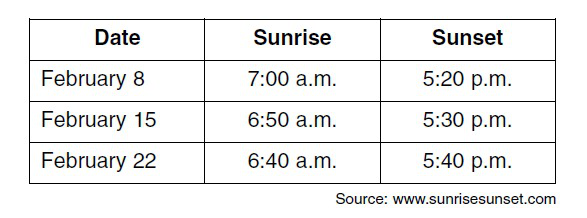

In [55]:
Image.open(test_image)

In [61]:
%load_ext snakeviz

The snakeviz extension is already loaded. To reload it, use:
  %reload_ext snakeviz


In [74]:
%%snakeviz
rows_marked, cols_marked = run_detect_only(test_image)

./examples/example_1.png
(587, 218)
nbt
b'{"language":"en","textAngle":0.0,"orientation":"Up","regions":[{"boundingBox":"126,86,342,431","lines":[{"boundingBox":"287,86,134,50","words":[{"boundingBox":"287,86,134,50","text":"Date"}]},{"boundingBox":"126,209,307,62","words":[{"boundingBox":"126,209,253,62","text":"February"},{"boundingBox":"401,212,32,47","text":"8"}]},{"boundingBox":"126,332,342,62","words":[{"boundingBox":"126,332,253,62","text":"February"},{"boundingBox":"405,335,63,47","text":"15"}]},{"boundingBox":"126,455,342,62","words":[{"boundingBox":"126,455,253,62","text":"February"},{"boundingBox":"400,458,68,47","text":"22"}]}]},{"boundingBox":"744,86,264,419","lines":[{"boundingBox":"762,86,232,50","words":[{"boundingBox":"762,86,232,50","text":"Sunrise"}]},{"boundingBox":"744,212,264,47","words":[{"boundingBox":"744,212,123,47","text":"7:00"},{"boundingBox":"889,221,119,38","text":"a.m."}]},{"boundingBox":"745,335,263,47","words":[{"boundingBox":"745,335,122,47","text":"6

b'[{"textAnnotations": [{"locale": "en", "description": "6:50 a.m.\\n", "boundingPoly": {"vertices": [{"x": 130, "y": 28}, {"x": 392, "y": 28}, {"x": 392, "y": 78}, {"x": 130, "y": 78}]}}, {"description": "6:50", "boundingPoly": {"vertices": [{"x": 130, "y": 28}, {"x": 249, "y": 28}, {"x": 249, "y": 78}, {"x": 130, "y": 78}]}}, {"description": "a.m.", "boundingPoly": {"vertices": [{"x": 277, "y": 28}, {"x": 392, "y": 28}, {"x": 392, "y": 78}, {"x": 277, "y": 78}]}}], "fullTextAnnotation": {"pages": [{"property": {"detectedLanguages": [{"languageCode": "en"}]}, "width": 522, "height": 117, "blocks": [{"property": {"detectedLanguages": [{"languageCode": "en"}]}, "boundingBox": {"vertices": [{"x": 130, "y": 28}, {"x": 392, "y": 28}, {"x": 392, "y": 78}, {"x": 130, "y": 78}]}, "paragraphs": [{"property": {"detectedLanguages": [{"languageCode": "en"}]}, "boundingBox": {"vertices": [{"x": 130, "y": 28}, {"x": 392, "y": 28}, {"x": 392, "y": 78}, {"x": 130, "y": 78}]}, "words": [{"property": {

b'[{"textAnnotations": [{"locale": "en", "description": "7:00 a.m.\\n", "boundingPoly": {"vertices": [{"x": 128, "y": 28}, {"x": 393, "y": 28}, {"x": 393, "y": 78}, {"x": 128, "y": 78}]}}, {"description": "7:00", "boundingPoly": {"vertices": [{"x": 128, "y": 28}, {"x": 248, "y": 28}, {"x": 248, "y": 78}, {"x": 128, "y": 78}]}}, {"description": "a.m.", "boundingPoly": {"vertices": [{"x": 276, "y": 28}, {"x": 393, "y": 28}, {"x": 393, "y": 78}, {"x": 276, "y": 78}]}}], "fullTextAnnotation": {"pages": [{"property": {"detectedLanguages": [{"languageCode": "en"}]}, "width": 522, "height": 117, "blocks": [{"property": {"detectedLanguages": [{"languageCode": "en"}]}, "boundingBox": {"vertices": [{"x": 128, "y": 28}, {"x": 393, "y": 28}, {"x": 393, "y": 78}, {"x": 128, "y": 78}]}, "paragraphs": [{"property": {"detectedLanguages": [{"languageCode": "en"}]}, "boundingBox": {"vertices": [{"x": 128, "y": 28}, {"x": 393, "y": 28}, {"x": 393, "y": 78}, {"x": 128, "y": 78}]}, "words": [{"property": {

b'[{"textAnnotations": [{"locale": "af", "description": "Date\\n", "boundingPoly": {"vertices": [{"x": 194, "y": 25}, {"x": 332, "y": 25}, {"x": 332, "y": 83}, {"x": 194, "y": 83}]}}, {"description": "Date", "boundingPoly": {"vertices": [{"x": 196, "y": 25}, {"x": 332, "y": 31}, {"x": 330, "y": 83}, {"x": 194, "y": 77}]}}], "fullTextAnnotation": {"pages": [{"property": {"detectedLanguages": [{"languageCode": "af"}]}, "width": 519, "height": 117, "blocks": [{"property": {"detectedLanguages": [{"languageCode": "af"}]}, "boundingBox": {"vertices": [{"x": 196, "y": 25}, {"x": 332, "y": 31}, {"x": 330, "y": 83}, {"x": 194, "y": 77}]}, "paragraphs": [{"property": {"detectedLanguages": [{"languageCode": "af"}]}, "boundingBox": {"vertices": [{"x": 194, "y": 25}, {"x": 332, "y": 25}, {"x": 332, "y": 83}, {"x": 194, "y": 83}]}, "words": [{"property": {"detectedLanguages": [{"languageCode": "af"}]}, "boundingBox": {"vertices": [{"x": 196, "y": 25}, {"x": 332, "y": 31}, {"x": 330, "y": 83}, {"x": 

 
*** Profile stats marshalled to file '/var/folders/89/qnfd36sx1rs246whpmhw3gh00000gq/T/tmp_mtf1hup'. 


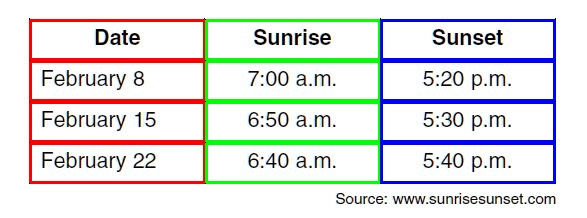

In [37]:
cols_marked

In [38]:
# complete_json = {"rows": [row.to_JSON() for row in rows_marked], "columns": [col.to_JSON() for col in cols_marked]}

In [98]:
with open('sight-word-bingo.json', 'w') as f:
    json.dump(complete_json, f)

In [90]:
with open('sight-word-bingo.json', 'r') as f:
    reloaded = json.load(f)

In [91]:
reloaded == complete_json

True

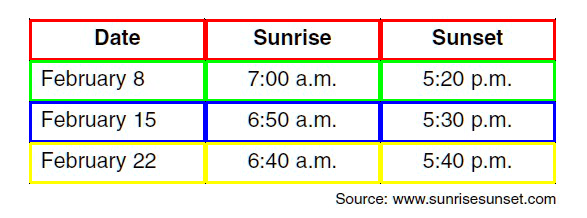

In [104]:
rows_marked

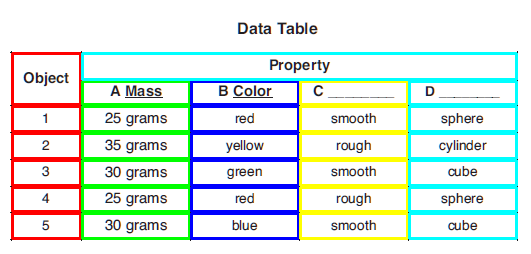

In [32]:
cols_marked

In [46]:
def detect_and_compare(image, expected_parse):
    import ai2.vision.tableparse
    rows, columns = ai2.vision.tableparse.detect(image)

    combined = {"rows": [row.to_JSON() for row in rows],
                "columns": [col.to_JSON() for col in columns]}

    with open(expected_parse, 'r') as f:
        gt_parse = json.load(f)

    return gt_parse, combined

In [50]:
gt, jr = detect_and_compare(Image.open('./examples/example_1.png'), '../test/gt_data/example_1.json')

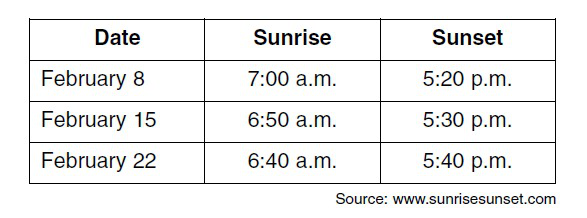

In [72]:
Image.open('./examples/example_1.png')

# connected components

In [77]:
from skimage import data
from skimage import filters
import cv2
from skimage import measure

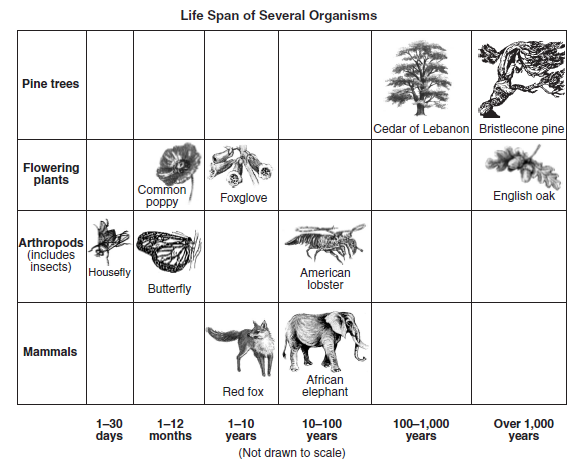

In [335]:
Image.open(hard_image)

In [395]:
hard_image = '/Users/schwenk/wrk/tableparse/data/tricky_tables/unnamed-3.png'
another_image = '/Users/schwenk/wrk/tableparse/data/tricky_tables/unnamed-2.png'
easy_image = '/Users/schwenk/wrk/tableparse/vision-tableparse/examples/example_1.png'

In [396]:
img = cv2.imread(another_image)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

val = filters.threshold_otsu(gray)
mask = gray < 250
convert_mask =  mask * np.ones_like(mask) * 255

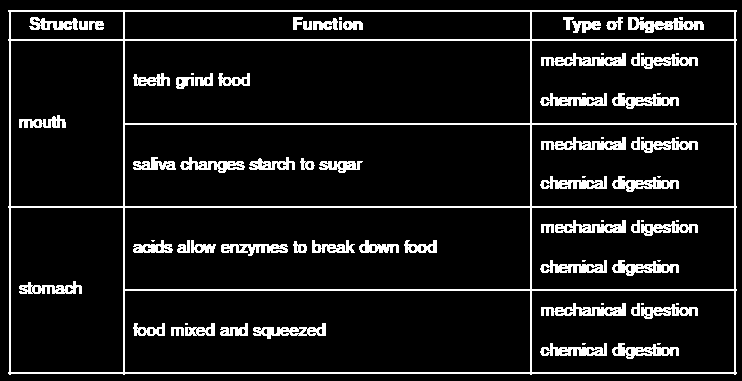

In [397]:
Image.fromarray(convert_mask.astype(np.uint8)).convert('RGB')

In [398]:
%%capture
n = 100
l = 256
im = filters.gaussian_filter(convert_mask, sigma=l / (4. * n))
# im = filters.median(convert_mask)

blobs = im > im.mean()
all_labels = measure.label(blobs)
blobs_labels = measure.label(blobs, background=0)

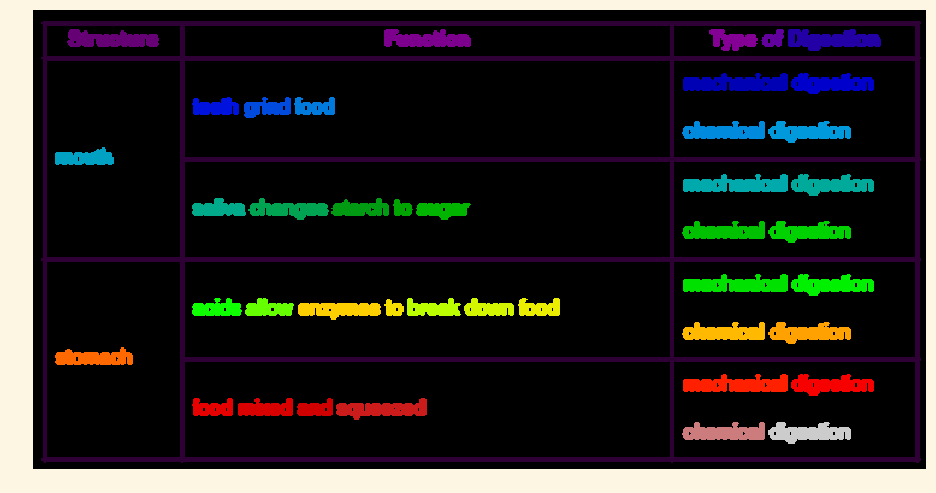

In [399]:
plt.imshow(blobs_labels, cmap='nipy_spectral')
_ = plt.axis('off')

In [400]:
cc = blobs_labels == 1
# cc = blobs_labels == 1
convert_mask =  cc * np.ones_like(cc) * 255
mimage = Image.fromarray(convert_mask.astype(np.uint8))

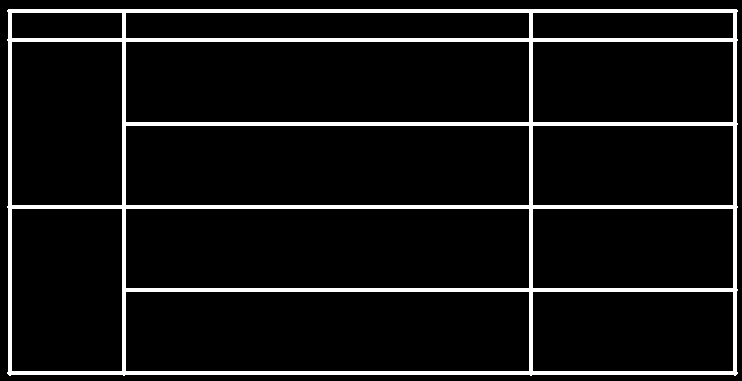

In [401]:
mimage.convert('RGB')

In [402]:
im2, contours, hierarchy = cv2.findContours(convert_mask.astype(np.uint8), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

tc = contours[1]

reshaped_tc = tc.reshape((tc.shape[0], 2))

print(reshaped_tc[:,:1].min(), reshaped_tc[:,1:].min(), '    ' ,reshaped_tc[:,:1].max(), reshaped_tc[:,1:].max())

# program execution

In [35]:
trace_df = pd.read_csv('../vision-tableparse/funtions_run.csv', header=None)
trace_df.columns = ['file', 'module', 'funcname']
trace_df = trace_df.applymap(lambda x: x.split(':')[1])

In [39]:
trace_df['funcname'].value_counts()

 <module>                                     510
 <listcomp>                                    19
 __new__                                       11
 <lambda>                                      10
 <genexpr>                                      9
 <dictcomp>                                     6
 new                                            6
 _accept                                        6
 Error                                          5
 Parser                                         4
 <setcomp>                                      4
 HTTPError                                      4
 _LazyDescr.__init__                            3
 MovedModule.__init__                           3
 MovedAttribute                                 3
 _import_module                                 3
 Encoder                                        3
 NullHandler                                    3
 Attribute                                      3
 _LazyDescr.__get__                             3


# End

In [53]:
gt == jr

False

In [54]:
gt.keys()

dict_keys(['rows', 'columns'])

In [99]:
# list(gt.values())[1]

In [100]:
# list(jr.values())[1]